<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
from google.colab import files
ss=files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


In [4]:
col_names = [
    'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]

df = pd.read_csv('breast-cancer-wisconsin.data', names=col_names)


In [5]:
df.drop('ID', axis=1, inplace=True)               # Drop ID as it's not useful for prediction
df = df.replace('?', np.nan)                      # Replace missing value indicators with NaN
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(float)  # Convert to float
df = df.dropna()                                  # Remove rows with missing values


In [6]:
X = df.drop('Class', axis=1)                      # Features
y = df['Class'].map({2: 0, 4: 1})                  # Labels: Benign (2) → 0, Malignant (4) → 1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


In [10]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })


In [11]:
results_df = pd.DataFrame(results)
print(results_df)


           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.956204   0.981481  0.913793  0.946429
1            SVM  0.963504   0.964912  0.948276  0.956522
2            KNN  0.963504   0.981818  0.931034  0.955752


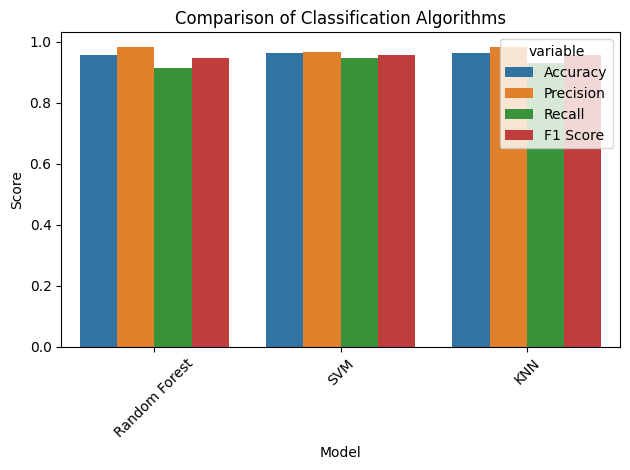

In [12]:
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Comparison of Classification Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
